In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D, BatchNormalization, InputLayer, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model,to_categorical
import pandas as pd
import seaborn as sns
import time

In [2]:
label_train = np.load("array/label_train_smote.npy")
img_train = np.load("array/img_train_smote.npy")
label_val = np.load("array/label_val.npy")
img_val = np.load("array/img_val.npy")
label_test = np.load("array/label_test.npy")
img_test = np.load("array/img_test.npy")

In [3]:
print(img_train.shape, img_val.shape)
print(label_train.shape, label_val.shape)

(22062, 20) (1100, 20)
(22062,) (1100,)


In [4]:
label_train = to_categorical(label_train)
label_val = to_categorical(label_val)  
label_test = to_categorical(label_test) 

label_train = np.reshape(label_train, (label_train.shape[0], 6))
img_train = np.reshape(img_train, (img_train.shape[0], img_train.shape[1], 1))
label_val = np.reshape(label_val, (label_val.shape[0], 6))
img_val = np.reshape(img_val, (img_val.shape[0], img_val.shape[1],  1))
label_test = np.reshape(label_test, (label_test.shape[0], 6))
img_test = np.reshape(img_test, (img_test.shape[0], img_test.shape[1],  1))

In [5]:
print(img_train.shape, img_val.shape, img_test.shape)
print(label_train.shape, label_val.shape, label_test.shape)

(22062, 20, 1) (1100, 20, 1) (1372, 20, 1)
(22062, 6) (1100, 6) (1372, 6)


In [6]:
model = Sequential()
model.add(InputLayer(input_shape=(20,1)))

model.add(Conv1D(8, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(16, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(32, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(450))
model.add(Activation('relu'))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 18, 8)             32        
_________________________________________________________________
batch_normalization (BatchNo (None, 18, 8)             32        
_________________________________________________________________
activation (Activation)      (None, 18, 8)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9, 8)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 16)             400       
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 16)             64        
_________________________________________________________________
activation_1 (Activation)    (None, 7, 16)             0

In [7]:
checkpoint = ModelCheckpoint("progress_01_smote.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')

In [8]:
start = time.time()
history = model.fit(img_train,label_train, epochs=200, steps_per_epoch = 5, validation_data=(img_val, label_val),callbacks=[checkpoint])
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/200
5/5 [==============================] - 2s 117ms/step - loss: 1.6246 - accuracy: 0.3276 - mae: 0.2635 - val_loss: 2.2462 - val_accuracy: 0.0309 - val_mae: 0.2929

Epoch 00001: val_accuracy improved from -inf to 0.03091, saving model to progress_01_smote.h5
Epoch 2/200
5/5 [==============================] - 0s 28ms/step - loss: 1.3015 - accuracy: 0.5473 - mae: 0.2295 - val_loss: 2.0146 - val_accuracy: 0.0391 - val_mae: 0.2848

Epoch 00002: val_accuracy improved from 0.03091 to 0.03909, saving model to progress_01_smote.h5
Epoch 3/200
5/5 [==============================] - 0s 27ms/step - loss: 1.0621 - accuracy: 0.6440 - mae: 0.1947 - val_loss: 1.7580 - val_accuracy: 0.0791 - val_mae: 0.2717

Epoch 00003: val_accuracy improved from 0.03909 to 0.07909, saving model to progress_01_smote.h5
Epoch 4/200
5/5 [==============================] - 0s 30ms/step - loss: 0.8873 - accuracy: 0.6882 - mae: 0.1648 - val_loss: 1.9032 - val_accuracy: 0.0864 - val_mae: 0.2768

Epoch 00004: val_ac

5/5 [==============================] - 0s 31ms/step - loss: 0.1167 - accuracy: 0.9642 - mae: 0.0251 - val_loss: 1.9436 - val_accuracy: 0.4982 - val_mae: 0.1874

Epoch 00033: val_accuracy did not improve from 0.51818
Epoch 34/200
5/5 [==============================] - 0s 31ms/step - loss: 0.1162 - accuracy: 0.9647 - mae: 0.0248 - val_loss: 1.9772 - val_accuracy: 0.5164 - val_mae: 0.1813

Epoch 00034: val_accuracy did not improve from 0.51818
Epoch 35/200
5/5 [==============================] - 0s 30ms/step - loss: 0.1137 - accuracy: 0.9659 - mae: 0.0240 - val_loss: 1.8970 - val_accuracy: 0.5591 - val_mae: 0.1705

Epoch 00035: val_accuracy improved from 0.51818 to 0.55909, saving model to progress_01_smote.h5
Epoch 36/200
5/5 [==============================] - 0s 27ms/step - loss: 0.1080 - accuracy: 0.9678 - mae: 0.0233 - val_loss: 2.0206 - val_accuracy: 0.5200 - val_mae: 0.1787

Epoch 00036: val_accuracy did not improve from 0.55909
Epoch 37/200
5/5 [==============================] - 0s 


Epoch 00066: val_accuracy improved from 0.65727 to 0.66727, saving model to progress_01_smote.h5
Epoch 67/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0422 - accuracy: 0.9892 - mae: 0.0099 - val_loss: 2.3970 - val_accuracy: 0.6691 - val_mae: 0.1157

Epoch 00067: val_accuracy improved from 0.66727 to 0.66909, saving model to progress_01_smote.h5
Epoch 68/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0419 - accuracy: 0.9899 - mae: 0.0097 - val_loss: 2.3811 - val_accuracy: 0.6691 - val_mae: 0.1142

Epoch 00068: val_accuracy did not improve from 0.66909
Epoch 69/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0407 - accuracy: 0.9900 - mae: 0.0097 - val_loss: 2.3976 - val_accuracy: 0.6618 - val_mae: 0.1160

Epoch 00069: val_accuracy did not improve from 0.66909
Epoch 70/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0400 - accuracy: 0.9900 - mae: 0.0094 - val_loss: 2.4569 - val_accuracy: 0.6573 - val_mae: 0.1177


Epoch 100/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0232 - accuracy: 0.9938 - mae: 0.0053 - val_loss: 1.3529 - val_accuracy: 0.7836 - val_mae: 0.0732

Epoch 00100: val_accuracy improved from 0.77545 to 0.78364, saving model to progress_01_smote.h5
Epoch 101/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0243 - accuracy: 0.9940 - mae: 0.0056 - val_loss: 1.3560 - val_accuracy: 0.7773 - val_mae: 0.0742

Epoch 00101: val_accuracy did not improve from 0.78364
Epoch 102/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0226 - accuracy: 0.9946 - mae: 0.0055 - val_loss: 1.3416 - val_accuracy: 0.7882 - val_mae: 0.0728

Epoch 00102: val_accuracy improved from 0.78364 to 0.78818, saving model to progress_01_smote.h5
Epoch 103/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0231 - accuracy: 0.9939 - mae: 0.0054 - val_loss: 1.2951 - val_accuracy: 0.7909 - val_mae: 0.0712

Epoch 00103: val_accuracy improved from 0.78818 to 

5/5 [==============================] - 0s 32ms/step - loss: 0.0154 - accuracy: 0.9966 - mae: 0.0037 - val_loss: 0.5082 - val_accuracy: 0.8927 - val_mae: 0.0382

Epoch 00132: val_accuracy did not improve from 0.89636
Epoch 133/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0138 - accuracy: 0.9971 - mae: 0.0034 - val_loss: 0.5273 - val_accuracy: 0.8891 - val_mae: 0.0390

Epoch 00133: val_accuracy did not improve from 0.89636
Epoch 134/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0123 - accuracy: 0.9976 - mae: 0.0030 - val_loss: 0.4753 - val_accuracy: 0.9027 - val_mae: 0.0349

Epoch 00134: val_accuracy improved from 0.89636 to 0.90273, saving model to progress_01_smote.h5
Epoch 135/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0119 - accuracy: 0.9978 - mae: 0.0030 - val_loss: 0.5327 - val_accuracy: 0.8882 - val_mae: 0.0396

Epoch 00135: val_accuracy did not improve from 0.90273
Epoch 136/200
5/5 [==============================] -


Epoch 00166: val_accuracy did not improve from 0.93000
Epoch 167/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0066 - accuracy: 0.9991 - mae: 0.0018 - val_loss: 0.3751 - val_accuracy: 0.9264 - val_mae: 0.0256

Epoch 00167: val_accuracy did not improve from 0.93000
Epoch 168/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0064 - accuracy: 0.9990 - mae: 0.0017 - val_loss: 0.3811 - val_accuracy: 0.9255 - val_mae: 0.0256

Epoch 00168: val_accuracy did not improve from 0.93000
Epoch 169/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0061 - accuracy: 0.9989 - mae: 0.0017 - val_loss: 0.3722 - val_accuracy: 0.9318 - val_mae: 0.0250

Epoch 00169: val_accuracy improved from 0.93000 to 0.93182, saving model to progress_01_smote.h5
Epoch 170/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0060 - accuracy: 0.9990 - mae: 0.0016 - val_loss: 0.3808 - val_accuracy: 0.9318 - val_mae: 0.0255

Epoch 00170: val_accuracy did not imp

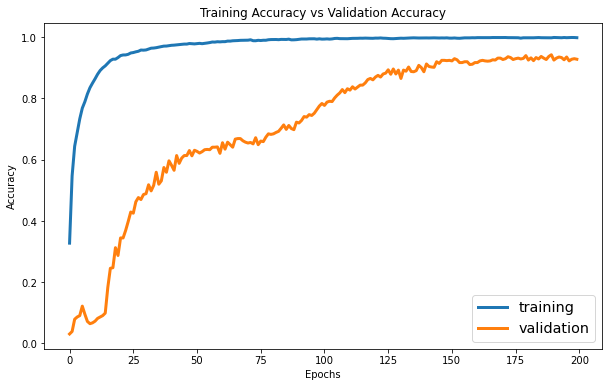

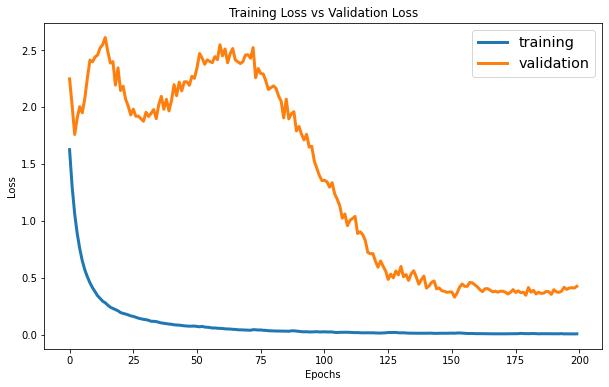

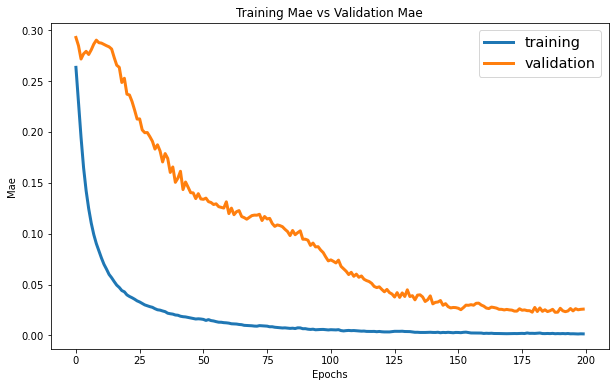

In [9]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'training', linewidth = 3)
plt.plot(history.history['val_accuracy'], label = 'validation', linewidth = 3)
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize = 'x-large')
plt.show()
#plt.savefig("Pic/Training Accuracy vs Validation Accuracy_Batuk.jpg")

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'training', linewidth = 3)
plt.plot(history.history['val_loss'], label = 'validation', linewidth = 3)
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize = 'x-large')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(history.history['mae'], label = 'training', linewidth = 3)
plt.plot(history.history['val_mae'], label = 'validation', linewidth = 3)
plt.title('Training Mae vs Validation Mae')
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.legend(fontsize = 'x-large')
plt.show()
#plt.savefig("Pic/Training Loss vs Validation Loss_Batuk.jpg")

                precision    recall  f1-score   support

Bronchiectasis       0.25      0.05      0.08        21
 Bronchiolitis       0.00      0.00      0.00        32
          COPD       0.92      0.77      0.84      1149
       Healthy       0.08      0.28      0.12        64
     Pneumonia       0.04      0.02      0.02        57
          URTI       0.26      0.45      0.33        49

      accuracy                           0.68      1372
     macro avg       0.26      0.26      0.23      1372
  weighted avg       0.79      0.68      0.72      1372



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

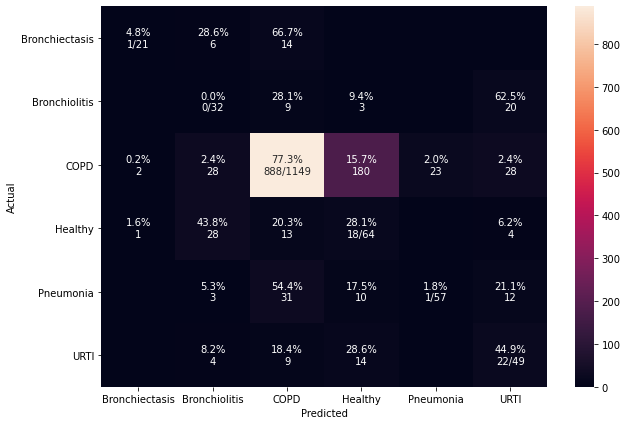

In [10]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
matrix_index = ['Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'Pneumonia', 'URTI']

preds = model.predict(img_test)
classpreds = np.argmax(preds, axis=1) # predicted classes 
y_testclass = np.argmax(label_test, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
 
    ]df_cm
= pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')
#plt.savefig("Pic/Table Crosscheck_Batuk.jpg")